In [1]:
import pandas as pd
from psifr import fr
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("tt.fr.order.csv")

In [14]:
#create column for correct order

def get_order(item):
    if item == 'animal':
        return '1'
    elif item == 'board':
        return '2'
    elif item == 'brain':
        return '3'
    elif item == 'plant':
        return '4'
    elif item == 'poster':
        return '5'
    elif item == 'popup':
        return '6'
    elif item == 'teapot':
        return '7'
    elif item == 'camera':
        return '8'
    elif item == 'typewriter':
        return '9'
    elif item == 'frisbee':
        return '10'
    elif item == 'books':
        return '11'
    elif item == 'record':
        return '12'
    elif item == 'game':
        return '13'
    elif item == 'microscope':
        return '14'
    elif item == 'ball':
        return '15'
    elif item == 'spaceship':
        return '16'

# Apply the get_order function to the order column
data['cor.order'] = data['item'].apply(get_order)

data.to_csv('tt.fr.order.csv', index=False)


In [4]:
#split age groups
data.adult = data[data['age_group'] == 'adult']
data.yc = data[data['age_group'] == 'child1']
data.oc = data[data['age_group'] == 'child2']

<ipython-input-4-a748cce7dfef>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.adult = data[data['age_group'] == 'adult']
<ipython-input-4-a748cce7dfef>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.yc = data[data['age_group'] == 'child1']
<ipython-input-4-a748cce7dfef>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.oc = data[data['age_group'] == 'child2']


In [3]:
data

,subject,age,age_group,gender,trial_type,position,item,list
0,200,21.03,adult,Female,recall,1,animal,1
1,200,21.03,adult,Female,recall,2,board,1
2,200,21.03,adult,Female,recall,3,popup,1
3,200,21.03,adult,Female,recall,4,teapot,1
4,200,21.03,adult,Female,recall,5,ball,1
...,...,...,...,...,...,...,...,...
2946,329,11.02,child2,Female,study,12,record,1
2947,329,11.02,child2,Female,study,13,game,1
2948,329,11.02,child2,Female,study,14,microscope,1
2949,329,11.02,child2,Female,study,15,ball,1


In [5]:
merged = fr.merge_free_recall(data)
merged_adult = fr.merge_free_recall(data.adult)
merged_yc = fr.merge_free_recall(data.yc)
merged_oc = fr.merge_free_recall(data.oc)

In [21]:
merged.to_csv('tt.fr.serialpos.csv', index=False)

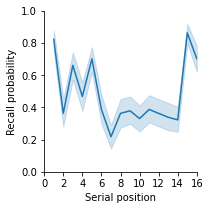

In [22]:
#plot recall probability for all
recall = fr.spc(merged)

g = fr.plot_spc(recall)
g.set(xlim=(0, 16), xticks=[0,2,4,6,8,10,12,14,16])
g.tight_layout(pad=1)
plt.savefig('recall.prob.pdf', dpi = 300)

In [64]:
#create an accuracy column that is the integer version of the recall column Boolean True/False
merged["accuracy"] = merged["recall"].astype(int)

In [65]:
merged

,subject,list,item,input,output,study,recall,repeat,intrusion,prior_list,prior_input,accuracy
0,200,1,animal,1.0,1.0,True,True,0,False,NaN,NaN,1
1,200,1,board,2.0,2.0,True,True,0,False,NaN,NaN,1
2,200,1,brain,3.0,NaN,True,False,0,False,NaN,NaN,0
3,200,1,plant,4.0,10.0,True,True,0,False,NaN,NaN,1
4,200,1,poster,5.0,8.0,True,True,0,False,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,329,1,record,12.0,NaN,True,False,0,False,NaN,NaN,0
1996,329,1,game,13.0,7.0,True,True,0,False,NaN,NaN,1
1997,329,1,microscope,14.0,NaN,True,False,0,False,NaN,NaN,0
1998,329,1,ball,15.0,8.0,True,True,0,False,NaN,NaN,1


In [63]:
#get mean probability for each item
sub_pos = merged.groupby('subject')['accuracy'].mean()

ValueError: No axis named item for object type DataFrame

In [60]:
sub_pos

subject
200    0.6875
201    0.7500
202    0.7500
203    0.6875
204    0.6250
        ...  
325    0.3125
326    0.6250
327    0.2500
328    0.5625
329    0.5625
Name: accuracy, Length: 124, dtype: float64

In [66]:
merged.to_csv('merged.pos.csv')


In [51]:
merged_adult

,subject,list,item,input,output,study,recall,repeat,intrusion,prior_list,prior_input,accuracy
0,200,1,animal,1.0,1.0,True,True,0,False,NaN,NaN,1
1,200,1,board,2.0,2.0,True,True,0,False,NaN,NaN,1
2,200,1,brain,3.0,NaN,True,False,0,False,NaN,NaN,0
3,200,1,plant,4.0,10.0,True,True,0,False,NaN,NaN,1
4,200,1,poster,5.0,8.0,True,True,0,False,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
641,249,1,record,12.0,3.0,True,True,0,False,NaN,NaN,1
642,249,1,game,13.0,NaN,True,False,0,False,NaN,NaN,0
643,249,1,microscope,14.0,NaN,True,False,0,False,NaN,NaN,0
644,249,1,ball,15.0,4.0,True,True,0,False,NaN,NaN,1


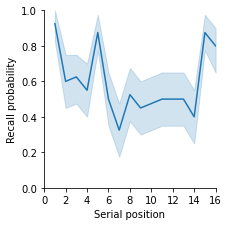

In [7]:
#plot recall probability for adults
recall = fr.spc(merged_adult)
g = fr.plot_spc(recall)
g.set(xlim=(0, 16), xticks=[0,2,4,6,8,10,12,14,16])
plt.savefig('recall.prob.adults.png', dpi = 300)

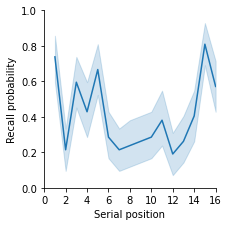

In [8]:
#plot recall probability for 8-10y
recall = fr.spc(merged_yc)
g = fr.plot_spc(recall)
g.set(xlim=(0, 16), xticks=[0,2,4,6,8,10,12,14,16])
plt.savefig('recall.prob.yc.png', dpi = 300)

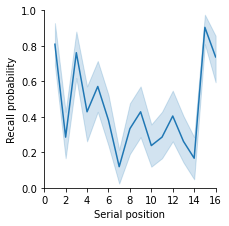

In [9]:
#plot recall probability for 11-13y
recall = fr.spc(merged_oc)
g = fr.plot_spc(recall)
g.set(xlim=(0, 16), xticks=[0,2,4,6,8,10,12,14,16])
plt.savefig('recall.prob.oc.png', dpi = 300)

In [19]:
recall

,subject,input,recall
0,225,1.0,True
1,225,2.0,True
2,225,3.0,True
3,225,4.0,True
4,225,5.0,True
...,...,...,...
667,329,12.0,False
668,329,13.0,True
669,329,14.0,False
670,329,15.0,True


In [11]:
crp = fr.lag_crp(merged)
crp_adult = fr.lag_crp(merged_adult)
crp_yc = fr.lag_crp(merged_yc)
crp_oc = fr.lag_crp(merged_oc)

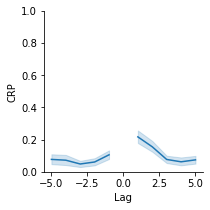

In [12]:
g = fr.plot_lag_crp(crp)
g.tight_layout(pad=1)
plt.savefig('crp.lab.pdf', dpi = 300)

In [13]:
df = fr.merge_free_recall(
    data, study_keys=['age_group'])

In [14]:
spc = df.groupby('age_group').apply(fr.spc)

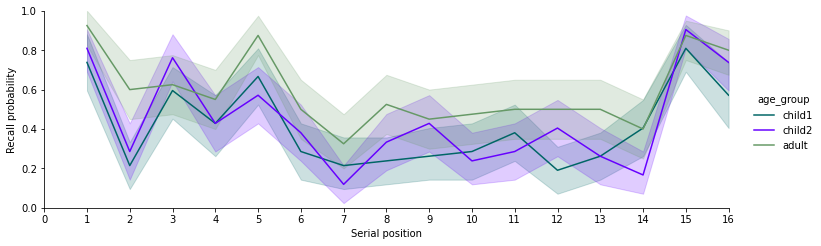

In [15]:
colors = {'child1' : '#006666', 'child2' : '#6600FF', 'adult' : '#669966'}

g = fr.plot_spc(spc, hue='age_group', hue_order = ["child1", "child2", "adult"], palette = colors,  height=3.5, aspect=3).add_legend()
g.set(xlim=(0, 16), xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
g.tight_layout(pad=1)
plt.savefig('recall.prob.all.pdf', dpi = 300)

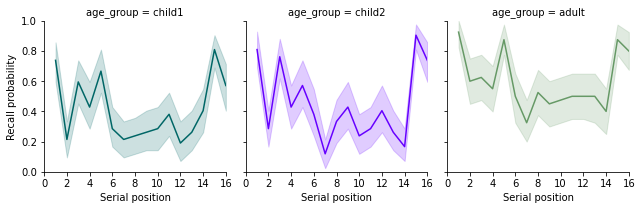

In [16]:
g = fr.plot_spc(spc, col='age_group',hue='age_group',col_order = ["child1", "child2", "adult"], hue_order = ["child1", "child2", "adult"], palette = colors)
g.set(xlim=(0, 16), xticks=[0,2,4,6,8,10,12,14,16])
g.tight_layout(pad=1)
plt.savefig('recall.prob.age.pdf', dpi = 300)

In [17]:
crp = df.groupby('age_group').apply(fr.lag_crp)

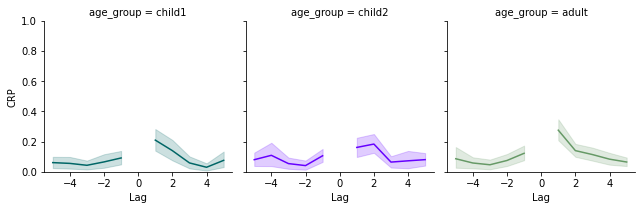

In [18]:
g = fr.plot_lag_crp(crp, col='age_group',hue='age_group',col_order = ["child1", "child2", "adult"], hue_order = ["child1", "child2", "adult"], palette = colors)
g.tight_layout(pad=1)
plt.savefig('crp.age.pdf', dpi = 300)